Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'dist1')

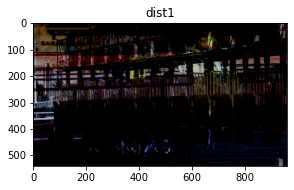

In [2]:
#差值
import cv2
import numpy as np
import matplotlib.pyplot as plt

#由于图像中的元素为numpy.array，其数据类型为uint8,无符号导致负数不能够正确表示
#读入数据的时候对图像进行数据类型转换：.astype(np.int16)
img1 = cv2.imread('H:/edge_dection/Jockey_001/LR_bicubic/4x/Jockey_001_bic.png').astype(np.int16)#1彩图，0灰度图
img2 = cv2.imread('H:/edge_dection/Ready_001/LR_bicubic/4x/Ready_001_bic.png').astype(np.int16)#
#print(img1,img2)
err = img2-img1   #差值的绝对值
'''
print(err)
cv2.imwrite('H:/edge_dection/Ready_008/err.png',err )
dst = cv2.add(img1,err)
cv2.imwrite('H:/edge_dection/Ready_008/sr+err.png',dst )
'''
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(err, cmap="gray")
plt.title("dist1")

Text(0.5, 1.0, 'dist1')

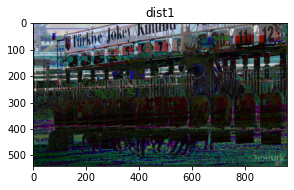

In [3]:
import cv2

img1 = cv2.imread('H:/edge_dection/Jockey_001/LR_bicubic/4x/Jockey_001_bic.png')
img2 = cv2.imread('H:/edge_dection/Ready_001/LR_bicubic/4x/Ready_001_bic.png')

#max
max = cv2.bitwise_and(img1,img2)#黑底彩边
'''
#print(max)
cv2.imwrite('H:/edge_dection/Ready_008/max.png',max)
'''
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(max, cmap="gray")
plt.title("dist1")

Text(0.5, 1.0, 'dist1')

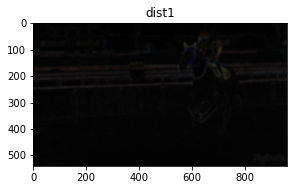

In [4]:

import cv2
import numpy as n


img1 = cv2.imread('H:/edge_dection/Jockey_001/LR_bicubic/4x/Jockey_001_bic.png', 1)/255.0
img2 = cv2.imread('H:/edge_dection/Ready_001/LR_bicubic/4x/Ready_001_bic.png', 1)/255.0 #1彩图，0灰度图
# 基层
base1 = cv2.boxFilter(img1, -1, (31, 31), normalize=1)#模糊处理
base2 = cv2.boxFilter(img2, -1, (31, 31), normalize=1)
    # 细节层
detail1 = img1 - base1#纹理
detail2 = img2 - base2

    # 拉普拉斯滤波
h1 = abs(cv2.Laplacian(img1, -1))
h2 = abs(cv2.Laplacian(img2, -1))

    # 高斯滤波
s1 = cv2.GaussianBlur(h1, ksize=(11, 11), sigmaX=5, sigmaY=5)
s2 = cv2.GaussianBlur(h2, ksize=(11, 11), sigmaX=5, sigmaY=5)
'''
cv2.imwrite('H:/edge_dection/Ready_008/ex.png',s1 )
'''
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(s1 , cmap="gray")
plt.title("dist1")

Text(0.5, 1.0, 'dist1')

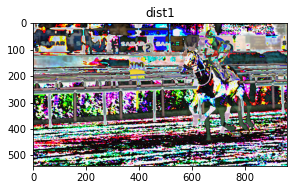

In [47]:
#残差计算方式1
import cv2

img1 = cv2.imread('H:/edge_dection/Jockey_001/LR_bicubic/4x/Jockey_001_bic.png')
img2 = cv2.imread('H:/edge_dection/Jockey_002/LR_bicubic/4x/Jockey_002_bic.png')

#residual = cv2.absdiff(img1,img2) #差值的绝对值
residual = np.abs( np.array(img1)- np.array(img2))#差值的绝对值

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(residual , cmap="gray")
plt.title("dist1")

Text(0.5, 1.0, 'dist1')

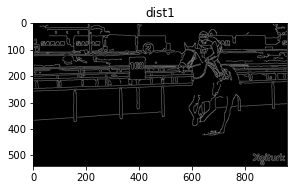

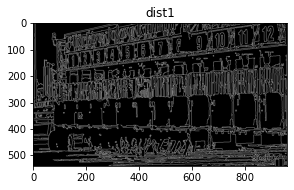

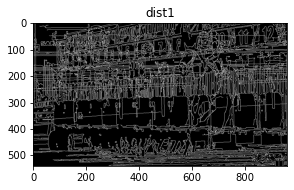

In [36]:
#边缘
import cv2
img1 = cv2.imread('H:/edge_dection/Jockey_001/LR_bicubic/4x/Jockey_001_bic.png')
img2 = cv2.imread('H:/edge_dection/Ready_001/LR_bicubic/4x/Ready_001_bic.png')

# 图像降噪
lenna1 = cv2.GaussianBlur(img1, (5, 5), 0)
lenna2 = cv2.GaussianBlur(img2, (5, 5), 0)

# Canny边缘检测，50为低阈值low，150为高阈值high
canny1 = cv2.Canny(lenna1, 5, 100,apertureSize=3,L2gradient=True)
canny2 = cv2.Canny(lenna2, 5, 100,apertureSize=3,L2gradient=True)

canny1 = cv2.cvtColor(canny1, cv2.COLOR_GRAY2RGB)
canny2 = cv2.cvtColor(canny2, cv2.COLOR_GRAY2RGB)

#边缘图差值
residual = cv2.absdiff(canny1,canny2) #差值的绝对值
#residual = canny1-canny2 #差值的绝对值

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(canny1, cmap="gray")
plt.title("dist1")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(canny2, cmap="gray")
plt.title("dist1")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(residual , cmap="gray")
plt.title("dist1")

Text(0.5, 1.0, 'dist1')

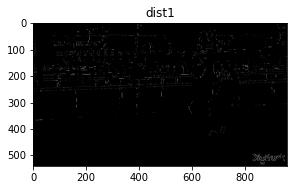

In [37]:
max = cv2.bitwise_and(canny1,canny2)#凸显不一样的地方

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(max, cmap="gray")
plt.title("dist1")